**Under_water_image_enhancement**


* We are using pretrained model  `WaterNet model` -https://arxiv.org/abs/1901.05495 to enhancement Under water image

In [3]:
#Importing essential  libraries
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Checking dependencies
torch.cuda.is_available()

True

In [5]:
#Downloading & importing pretrained model
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


In [15]:
!wget https://www.scuba.com/blog/wp-content/uploads/2010/03/blurry-fish.jpg

--2023-10-28 10:24:39--  https://www.scuba.com/blog/wp-content/uploads/2010/03/blurry-fish.jpg
Resolving www.scuba.com (www.scuba.com)... 151.101.1.55, 151.101.65.55, 151.101.129.55, ...
Connecting to www.scuba.com (www.scuba.com)|151.101.1.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘blurry-fish.jpg’

blurry-fish.jpg         [ <=>                ]  11.83K  --.-KB/s    in 0s      

2023-10-28 10:24:40 (23.5 MB/s) - ‘blurry-fish.jpg’ saved [12110]



In [1]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg

--2023-10-28 10:14:55--  https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462987 (452K) [image/jpeg]
Saving to: ‘ScubaDiver.jpg’

ScubaDiver.jpg      100%[===================>] 452.14K  --.-KB/s    in 0.05s   

2023-10-28 10:14:55 (8.21 MB/s) - ‘ScubaDiver.jpg’ saved [462987/462987]



In [16]:
im3=cv2.imread("blurry-fish.jpg")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'WaterNet output')

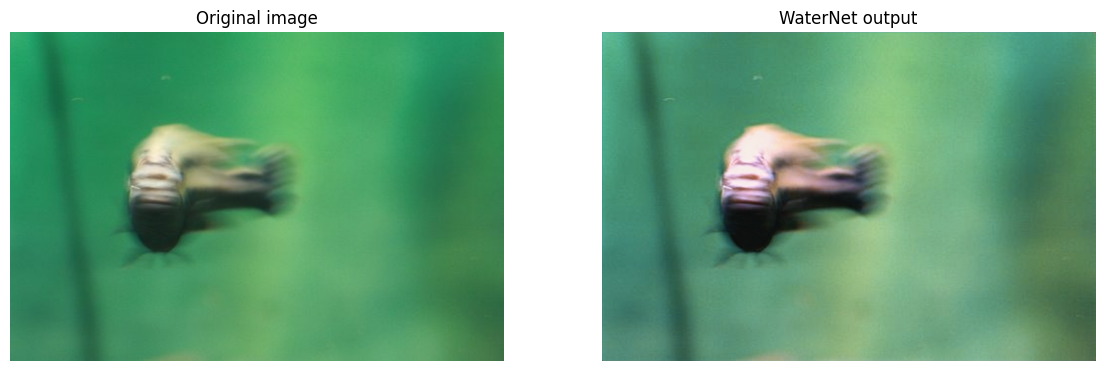

In [19]:
im3=cv2.imread("/content/blurry-fish.jpg")
rgb_im = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)


rgb_im = cv2.resize(rgb_im, (720, 480))


# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

Text(0.5, 1.0, 'WaterNet output')

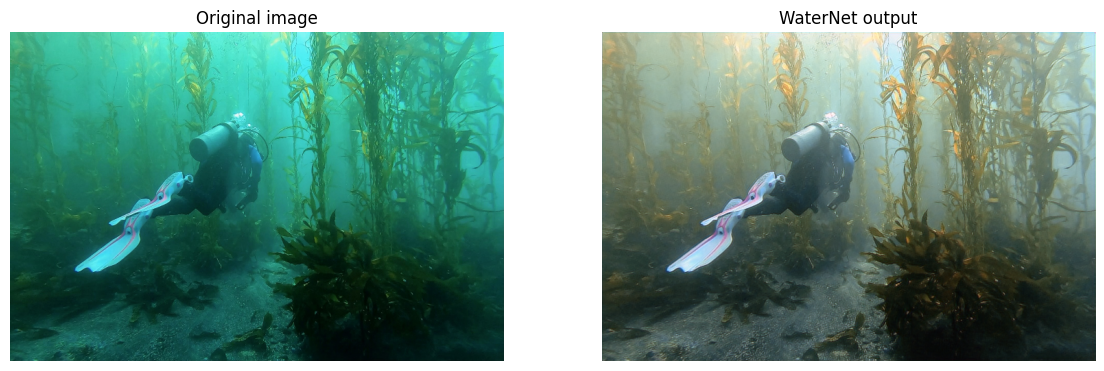

In [9]:
# Load one image using OpenCV
im = cv2.imread("ScubaDiver.jpg")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


rgb_im = cv2.resize(rgb_im, (720, 480))

# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")


Text(0.5, 1.0, 'WaterNet output')

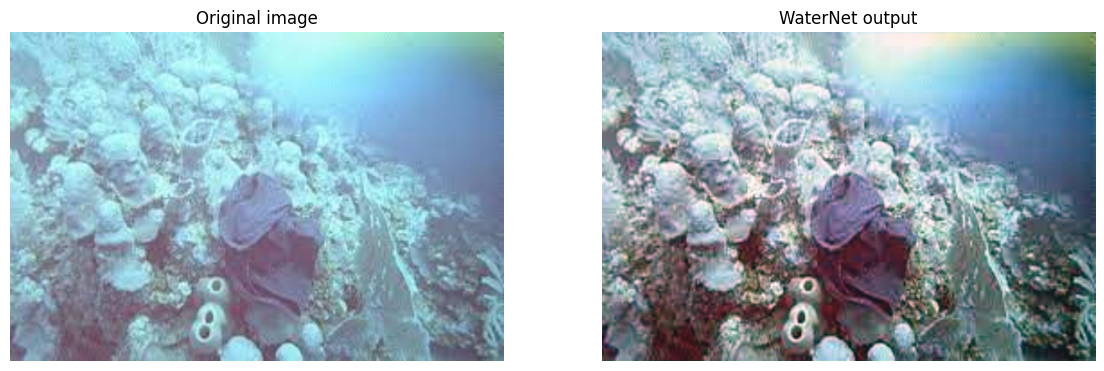

In [14]:
im2 = cv2.imread("/content/download.jpg")
rgb_im = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

rgb_im = cv2.resize(rgb_im, (720, 480))

# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")